In [1]:
import pandas
import numpy
import pickle
import networkx
import matplotlib.pyplot as plt
import matplotlib

## importing the data :

In [2]:
df = pandas.read_csv("Data2.csv")
df.head()

,ostan,name,lon,lat,ground_elevation,data,shamsi_date,max,max.1,max.2,max.3,sum
0,Airforce,Dezful (Airport),48.3831,32.3994,143.0,1996-03-21,1375-01-02 00:00:00,3.0,100.0,79.0,26.0,0.00
1,Airforce,Dezful (Airport),48.3831,32.3994,143.0,1996-03-22,1375-01-03 00:00:00,15.0,300.0,89.0,23.5,5.80
2,Airforce,Dezful (Airport),48.3831,32.3994,143.0,1996-03-23,1375-01-04 00:00:00,3.0,190.0,95.0,24.0,20.00
3,Airforce,Dezful (Airport),48.3831,32.3994,143.0,1996-03-24,1375-01-05 00:00:00,6.0,180.0,92.0,27.0,0.01
4,Airforce,Dezful (Airport),48.3831,32.3994,143.0,1996-03-25,1375-01-06 00:00:00,5.0,120.0,93.0,24.0,9.00


In [3]:
len(df)

2380294

In [4]:
df.dropna(subset=["sum"],inplace=True)
len(df)

2336447

## make the epoc time

In [5]:
df['data'] = pandas.to_datetime(df['data'])
df['data'] = (df['data'] - pandas.Timestamp("1996-01-01")) // pandas.Timedelta('1day')
df.head()

,ostan,name,lon,lat,ground_elevation,data,shamsi_date,max,max.1,max.2,max.3,sum
0,Airforce,Dezful (Airport),48.3831,32.3994,143.0,80,1375-01-02 00:00:00,3.0,100.0,79.0,26.0,0.00
1,Airforce,Dezful (Airport),48.3831,32.3994,143.0,81,1375-01-03 00:00:00,15.0,300.0,89.0,23.5,5.80
2,Airforce,Dezful (Airport),48.3831,32.3994,143.0,82,1375-01-04 00:00:00,3.0,190.0,95.0,24.0,20.00
3,Airforce,Dezful (Airport),48.3831,32.3994,143.0,83,1375-01-05 00:00:00,6.0,180.0,92.0,27.0,0.01
4,Airforce,Dezful (Airport),48.3831,32.3994,143.0,84,1375-01-06 00:00:00,5.0,120.0,93.0,24.0,9.00


## cut the crap

In [6]:
df2 = df[["name", "data", "lon","lat", "sum"]]
df2.head()

,name,data,lon,lat,sum
0,Dezful (Airport),80,48.3831,32.3994,0.00
1,Dezful (Airport),81,48.3831,32.3994,5.80
2,Dezful (Airport),82,48.3831,32.3994,20.00
3,Dezful (Airport),83,48.3831,32.3994,0.01
4,Dezful (Airport),84,48.3831,32.3994,9.00


In [7]:
cities = df2["name"].unique()
len(cities)

493

In [8]:
lens = []
for city in cities:
    out = (city, len(df2[df2["name"] == city]))
    lens.append(out)

## picking the right amount of data

In [9]:
cityLens = pandas.DataFrame(lens, columns = ["city", "len"])
cityLens.head()

,city,len
0,Dezful (Airport),6556
1,Dowshan Tappeh,6605
2,Hamedan (Nozheh),6560
3,Khurbirjand,6491
4,Konarak (Airport),6559


In [10]:
num = []
for i in range(8425):
    l = len(cityLens[cityLens["len"] > i])
    num.append(l)

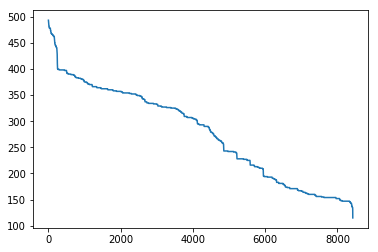

In [11]:
plt.plot(num)

In [12]:
num = numpy.array(num)

In [13]:
num[1000]

375

## now get the data that have rows more than the threshold

In [16]:
finalDF = pandas.DataFrame()
for city in cities:
    temp = df2[df2['name'] == city]
    if len(temp) > 1000:
        finalDF = finalDF.append(temp)
finalDF.head()

,name,data,lon,lat,sum
0,Dezful (Airport),80,48.3831,32.3994,0.00
1,Dezful (Airport),81,48.3831,32.3994,5.80
2,Dezful (Airport),82,48.3831,32.3994,20.00
3,Dezful (Airport),83,48.3831,32.3994,0.01
4,Dezful (Airport),84,48.3831,32.3994,9.00


In [17]:
len(finalDF)

2304015

In [19]:
cities = finalDF['name'].unique()
len(cities)

375

In [25]:
df3 = pandas.DataFrame()
for city in cities:
    temp = finalDF[finalDF["name"] == city]
    temp = temp[temp["sum"] > temp["sum"].quantile(.95)]
    df3 = df3.append(temp)
len(df3)

111315

In [26]:
df3.head()

,name,data,lon,lat,sum
1,Dezful (Airport),81,48.3831,32.3994,5.8
2,Dezful (Airport),82,48.3831,32.3994,20.0
4,Dezful (Airport),84,48.3831,32.3994,9.0
23,Dezful (Airport),103,48.3831,32.3994,7.6
24,Dezful (Airport),104,48.3831,32.3994,34.6


In [27]:
len(df3["name"].unique())

375

In [28]:
for city in cities:
    print("city : {} with len : {}".format(city, len(df3[df3['name'] == city])))

city : Dezful (Airport) with len : 326
city : Dowshan Tappeh with len : 326
city : Hamedan (Nozheh) with len : 325
city : Khurbirjand with len : 325
city : Konarak (Airport) with len : 216
city : Kushk-E-Nosrat-Airport with len : 50
city : Omidiyeh (Air Base) with len : 326
city : Hashtgerd with len : 228
city : Karaj with len : 421
city : Karaj (Agricultural) with len : 65
city : Taleghan with len : 191
city : Ardebil with len : 395
city : Ardebil (Airport) with len : 257
city : Bilehsowar with len : 280
city : Firuzabad (Ardebil) with len : 221
city : Germi with len : 261
city : Khalkhal with len : 419
city : Meshkinshahr with len : 417
city : Namin with len : 191
city : Nir with len : 184
city : Parsabad with len : 385
city : Sareyn with len : 298
city : Bukan with len : 248
city : Chaldoran with len : 256
city : Kahriz with len : 228
city : Khoy with len : 422
city : Khoy (Airport) with len : 67
city : Mahabad with len : 405
city : Maku with len : 422
city : Miandoab with len : 289

In [29]:
df3.to_csv("preprocessed.csv")